# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
#importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the CSV file
df=pd.read_csv('recipe_site_traffic_2212.csv')

In [2]:
#display the first 5 rows 
print(df.head())

   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]


In [3]:
#display the deails of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


## Data validation and Cleaning

In [4]:
#printing the types of the columns
print(df.dtypes)

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object


In [5]:
#checking the unique values of 'category','servings', 'high_traffic'
for col in ['category','servings', 'high_traffic']:
    print('unique values of',col,df[col].unique())
    print('number of unique values of',col,df[col].nunique())
    print('--------')

unique values of category ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
number of unique values of category 11
--------
unique values of servings ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
number of unique values of servings 6
--------
unique values of high_traffic ['High' nan]
number of unique values of high_traffic 1
--------


In [6]:
#check missing values
print(df.isnull().sum())

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


### From the previous we can conclude that:
    1- high_traffic has so many 'NaN' when the traffic is not high:
        change 'NaN' to 0 and changing High to 1
    2- category has an extra category 'Chicken Breast' which should be just 'Chicken':
        change 'Chicken Breast' to 'Chicken'
    3- servings is not Numeric as there are "as a snack" extra part in only 3 rows:
        remove the sub-string
        change to int type
    4- there are 52 missing values in columns ['calories', 'carbohydrate', 'sugar', 'protein'] 
    which represents 5.5% of the data set:
        remove them after correcting high_traffic
      

In [7]:
#replace 'Nan' in high_traffic with 0 and High with 1
df.high_traffic.replace(np.nan,'Low',inplace=True)
#verify the change
print('Unique values of high_traffic column',df.high_traffic.unique())
print('Number of unique values of high_traffic column',df.high_traffic.nunique())

Unique values of high_traffic column ['High' 'Low']
Number of unique values of high_traffic column 2


In [8]:
#replace 'Chicken Breast' in category with 'Chicken'
print('Unique values of category column before the change',df.category.unique())
df.category.replace('Chicken Breast','Chicken',inplace=True)
#verify the change
print('Unique values of high_traffic column after the change',df.category.unique())

Unique values of category column before the change ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
Unique values of high_traffic column after the change ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']


In [9]:
#remove ' as a snack' from servings
df.servings=df.servings.str.replace(' as a snack','')
#verify the change
print('Unique values of servings column', df.servings.unique())
print('Number of unique values of servings column',df.servings.nunique())
#change servings type to int
df.servings=pd.to_numeric(df.servings).convert_dtypes() 
#verify the change
print('Type of servings column',df.servings.dtypes)

Unique values of servings column ['6' '4' '1' '2']
Number of unique values of servings column 4
Type of servings column Int64


In [10]:
#drop the 52 rows with missing values
#drop the missing values
df.dropna(inplace=True)
#verify the change
print(df.isnull().sum())
print(df.info())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    Int64  
 7   high_traffic  895 non-null    object 
dtypes: Int64(1), float64(4), int64(1), object(2)
memory usage: 63.8+ KB
None


### checking the data and checking the relationship with high_traffic

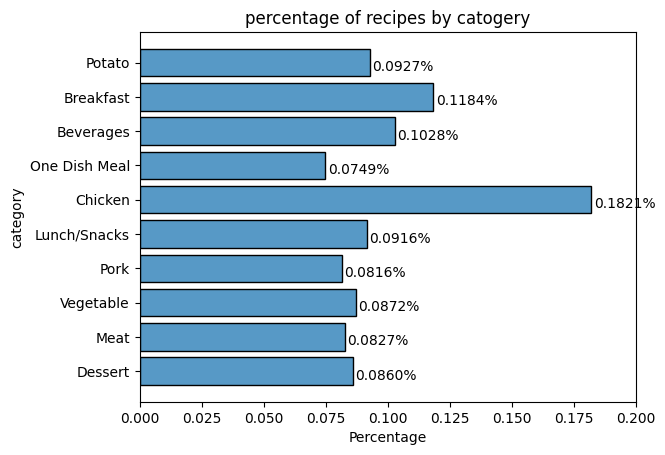

In [11]:
# displaying the percenrage of each category
g=sns.histplot(data=df, y="category", bins=15, multiple="dodge",stat='density',discrete=True,shrink=.8)
# plt.xticks(rotation = 60)
plt.xticks(np.arange(0,0.225,0.025))
plt.title('percentage of recipes by catogery')
plt.xlabel('Percentage')
for p in g.patches:
    g.annotate(format(p.get_width(), '.4f')+'%',(p.get_width()+0.001,p.get_y() + p.get_height()*.8)) 
plt.show()

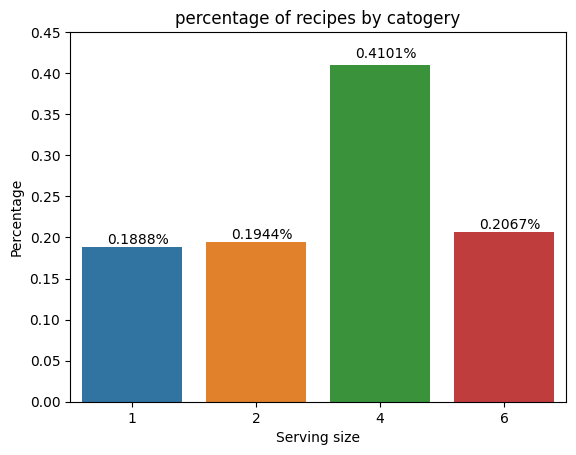

In [12]:
# displaying the percenrage of each serving size
b=sns.barplot(x=df.servings.value_counts().index,y=df.servings.value_counts(normalize=True))
plt.yticks(np.arange(0,0.5,0.05))
for p in b.patches:
    b.annotate(format(p.get_height(), '.4f')+'%',(p.get_x() + p.get_width()*0.25,p.get_height()*1.02)) 
plt.title('percentage of recipes by catogery')
plt.ylabel('Percentage')
plt.xlabel('Serving size')
plt.show()

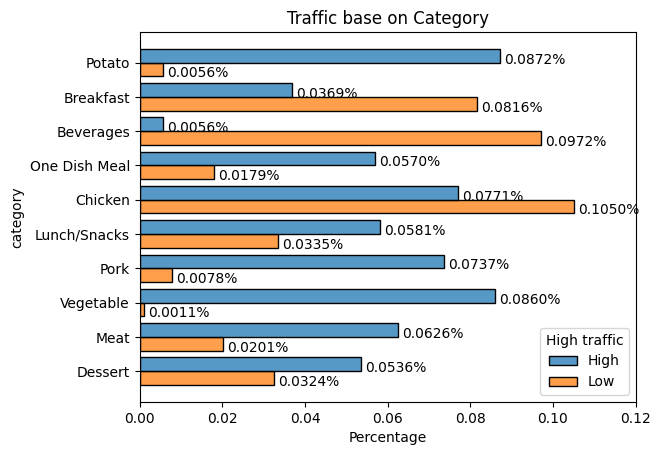

In [13]:
#displaying the percentage of each category in the high_traffic
ax=sns.histplot(data=df,y='category', hue="high_traffic",multiple="dodge",stat='density',discrete=True,shrink=.8)
sns.move_legend(ax, "lower right",title='High traffic')
plt.title('Traffic base on Category')
plt.xticks(np.arange(0,0.13,0.02))
plt.xlabel('Percentage')
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f')+'%',(bar.get_width()+0.001,bar.get_y() + bar.get_height()*1.05))
plt.show()

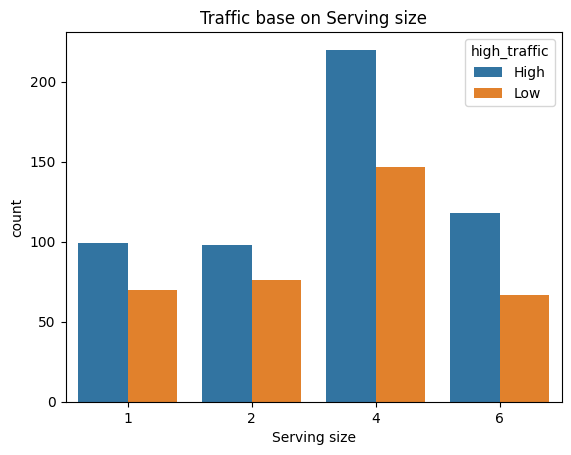

In [14]:
#displaying the relationship between serving size and traffic
sns.countplot(data=df, x='servings',hue='high_traffic', order=df.servings.value_counts().sort_index().index)
plt.title('Traffic base on Serving size')
plt.xlabel('Serving size')
plt.show()

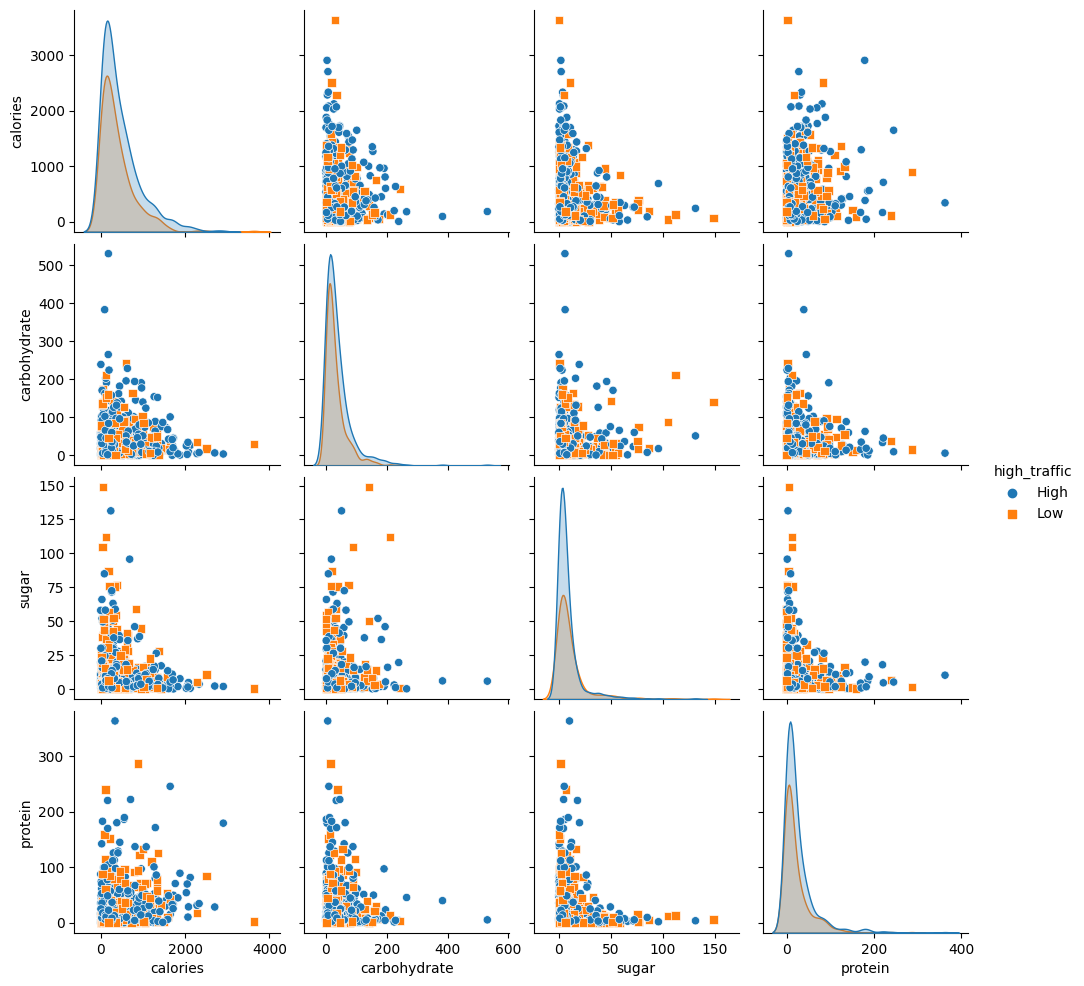

In [15]:
#investigating weather a strong relationsip between 'calories', 'carbohydrate', 'sugar', 'protein' and "high_traffic" exist
sns.pairplot(df,vars =['calories', 'carbohydrate', 'sugar', 'protein'], hue = "high_traffic", markers=["o", "s"]);

##### The graph does not show any clear relationship between variable which requires further Correlation testing

# data insights based on the previous Graphs:
    1- the Correlation between the traffic and calories, carbohydrate, sugar, protein are very weak
    2- as a result, the output mainly depends on the recipe category and serving size
    3- the majority of recipes are chicken recipes however Potato and Vegetable generates more Traffic
    4- Beverages generated the least traffic 
    5- serving size of 4 generates the most traffic



# Model Development:
    - This is a binary classification problem where there is only two output classes (high and low traffic)
    - Logistic Regression will be used as the baseline model:
        1- It is easier to implement, interpret, and very efficient to train.
        2- It is less inclined to over-fitting
    - Random Forest will be used as a comparison model:
        1- It works well with both categorical and continuous values
        2- Normalization of data is not required as it uses a rule-based approach
    - Gradient Boost Classifier is the final option:
       1- Faster training speed and higher efficiency
       2- Lower memory usage

    
 
### steps:
    1- create dummy variables for category and serving and change high_traffic to (0,1)
    2- divide the data into training and testing
    3- normalize the values
    4- initiate the model 
    5- train the model
    6- get the training and testing scores
    7- plot to compare the models

In [16]:
# importing the needed packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [17]:
#applying label encoder to all the data to encode the categorical columns (high_traffic and category)
df=df.apply(LabelEncoder().fit_transform)

In [18]:
#data scaling making sure to scale only the correct columns
ss_train = StandardScaler()
df[['calories',  'carbohydrate',  'sugar',  'protein']] = ss_train.fit_transform(df[['calories',  'carbohydrate',  'sugar',  'protein']])

In [19]:
# creating a 75%-25% split for Training and test subset
X=df.drop(['recipe', 'high_traffic'], axis=1)
y=df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)
print('shape of Training set', X_train.shape)
print('shape of Testing set', X_test.shape)

shape of Training set (671, 6)
shape of Testing set (224, 6)


In [20]:
# Logistic Regression
LR = LogisticRegression(random_state=0)
#fitting the model
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
print ('Logistic Regression Testing score',round(LR.score(X_test, y_test),5))

Logistic Regression Testing score 0.77679


In [21]:
#Random Forest
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
#fitting the model
RF.fit(X_train, y_train)
RF_y_pred = RF.predict(X_test)

In [22]:
#checking for overfitting
print ('Random Forest Training score',round(RF.score(X_train, y_train),5))
print ('Random Forest Testing score',round(RF.score(X_test, y_test),5))

Random Forest Training score 0.76751
Random Forest Testing score 0.73214


In [23]:
#Random Forest with improved params
RF_params = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split= 10,
                                   bootstrap=True,max_features=3,min_samples_leaf=4,random_state=0)
#fitting the model
RF_params.fit(X_train, y_train)
RF_params_y_pred = RF.predict(X_test)

In [24]:
#checking for overfitting
print ('Random Forest Training score',round(RF_params.score(X_train, y_train),5))
print ('Random Forest Testing score',round(RF_params.score(X_test, y_test),5))

Random Forest Training score 0.89419
Random Forest Testing score 0.75893


### improving the Random Forest model by tuning the hyperparams


#### Not good enough testing score for the Logistic Regression and the Random Forest even with HyperTuning
### Introducing the Gradient Boosting Classifier

In [25]:
#imporitng the classfier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print ('GBC Training score',round(gbc.score(X_train, y_train),5)) 
print ('GBC Testing score',round(gbc.score(X_test, y_test),5)) 

GBC Training score 0.87928
GBC Testing score 0.74554


##### Hyper paramenters tuning

In [27]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train, y_train)
print(cv.best_estimator_)
best=cv.best_estimator_
best.fit(X_train, y_train)
print ('GBC Training score',round(best.score(X_train, y_train),5)) 
print ('GBC Testing score',round(best.score(X_test, y_test),5)) 

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500)
GBC Training score 0.76155
GBC Testing score 0.77679


##### Finding the best random state split for the best model of GBC

In [28]:
scores={}
for x in range (1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=x)
    gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05,max_depth=1, random_state=x).fit(X_train, y_train);
    scores[x]=round(gbc.score(X_test, y_test),5)

best_random_state=max(scores, key=scores.get)
print('Best testing score is :',max(scores.values()))
print('Best testing score happens at random state : ',best_random_state) 

Best testing score is : 0.83482
Best testing score happens at random state :  270


#### Training the best model at the best random state

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=best_random_state)
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05,max_depth=1,
                                 random_state=best_random_state).fit(X_train, y_train)
print ('GBC Testing score',round(clf.score(X_test, y_test),5)*100,'%') 

GBC Testing score 83.482 %


#### commenting on the models
- Both Random Forest and Logistic Regression do not show any over fitting since the testing score is lightly less than the Training score
- the Random Forest out preform the Logistic Regression in both accuracy and recall
- Random Forest optimization did not reach the requires prediction score
- using Gradient boost classifier with optimization did achieve the min score request

### Define a way to compare your model performance to the business
the common way to compare ML model to business is using accuracy and recall scores which are used to measure the model ability to identify the correct answer.



In [30]:
#using accuracy and recall with Gradient boost classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred=clf.predict(X_test)
print ('Business accuracy is: ',round(df.high_traffic.value_counts(normalize=True)[0],4))
print ('GBC Aaccuarcy is: ',round(accuracy_score(y_pred, y_test),4))

Business accuracy is:  0.5978
GBC Aaccuarcy is:  0.8348


#### this shows that:
    - The model accuracy shows that it can correctly classify more than 83% of the data in the test set.
    - The model precision suggests that the cases the model classified as positive, more than 80% are true positive.
    - The model recall demonstrates that the model is able to correctly predict more than 80% of the true positive cases

##### the business accuracy is only 59.8%


# Final summary:
- Both Logistic regression and Random Forest classifiers, which did not meet the required performance
- tuning for hyper parameter improved the models performance dramatically however it did not help the classifiers to reach the required scores
- using Gradient boost classifier showed a great start and with hyper tuning it reached the required status

# Business recommendation:
- the business should implement the model since it can identify more than 80% of the high traffic generating recipes
- it is always a good practice to retrain the model with more data to improve its performance, in addition to capturing any changes in the customers behavior


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation